In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as mns
import plotly.express  as px
%matplotlib inline

In [9]:
salary=pd.read_csv('Salary_Data.csv')

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
#mns.bar( salary)

In [4]:
X=salary[['YearsExperience']]
y=salary['Salary']

NameError: name 'salary' is not defined

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.1,random_state=1)

# to build model

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
pred=model.predict(X_test)

In [23]:
pred

array([75389.2962963 , 92329.11079971, 62213.88501586])

In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8453155338321456


In [25]:
#hence, the accuracy of this model is 80 percent, but first check the level of error

In [26]:
print(model.coef_)

[9411.00805745]


In [27]:
print(model.intercept_)

25510.95359179465


In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,pred))

4882.235962709958


In [29]:
print(mean_squared_error(y_test,pred))

31869368.148030963


In [30]:
print(np.sqrt(mean_squared_error(y_test,pred)))

5645.2961080913165


In [31]:
coef=pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient'])

In [32]:
coef

,Coefficient
YearsExperience,9411.008057


In [33]:
#to predict new data set

In [38]:
pred2=model.predict([[15]])

In [35]:
pred2

array([110210.02610887])

# TO WORK ON MULTIPLE REGRESSION

In [41]:
car=pd.read_csv('CarPrice_Assignment.csv')

In [42]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#mns.bar(car,color='blue')

NameError: name 'mns' is not defined

In [48]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [49]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [54]:
categorical=['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem']
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for cat in categorical:
    car[cat]= enc.fit_transform(car[cat])

In [55]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,5,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,5,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,3,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,3,4,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,4,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
car.drop('car_ID',axis=1, inplace=True)

In [58]:
X=car.drop('price',axis=1)
y=car['price']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=1)

In [60]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [63]:
pred3= model2.predict(X_test)

In [64]:
pred3

array([ 7003.90589875,  5378.99345901,  5322.31270458,  5710.73331365,
        8435.3697876 , 27237.3985158 ,  7599.77613342,   643.84472313,
        7005.80723498, 11658.13954058, 16242.34715739, 14760.80455218,
       14711.30484687, 10126.71806004, 14935.81244394, 12919.57915912,
        5836.31962712,  8754.29356931, 14196.95752855,  9510.4574539 ,
        9302.53360923,  7479.68962026, 14622.86459738,  7220.66508981,
       11800.08292791,  8604.40243789, 14181.7297926 ,  8208.86675785,
        6936.32886748,  9080.07790671,  5309.43875678, 12463.11753225,
       24377.60675468,  9370.94124666, 19163.4601277 ,  6713.04877485,
        8134.49785274, 29186.37926993, 10909.65465022, 18115.34069041,
        7004.47556228])

In [65]:
print(r2_score(y_test,pred3))

0.782251219469525


In [66]:
print(model2.coef_)

[ 1.77320165e+02 -2.98531730e+01  3.71482392e+03  6.22945353e+02
 -1.60975044e+03 -9.15526150e+02  1.26983849e+03  1.20770928e+04
  1.27737362e+02 -9.01573041e+01  8.18723797e+02  2.95423448e+02
  1.82674417e+00  1.56794755e+02 -2.39312952e+02  8.28113269e+01
 -1.20215103e+01 -1.40989065e+03 -2.26617347e+03  4.19898545e+02
  2.50137263e+01  8.67735296e-01 -1.08488575e+02  2.26099898e+01]


In [67]:
print(model2.intercept_)

-66408.40557560629


In [68]:
coef=pd.DataFrame(data=model2.coef_, index=X.columns, columns=['Coefficient'])

In [69]:
coef

,Coefficient
symboling,177.320165
CarName,-29.853173
fueltype,3714.823917
aspiration,622.945353
doornumber,-1609.750443
carbody,-915.526150
drivewheel,1269.838494
enginelocation,12077.092832
wheelbase,127.737362
carlength,-90.157304


In [72]:
print(mean_absolute_error(y_test,pred3))

2220.455695168918


In [73]:
print(mean_squared_error(y_test,pred3))

11965410.32458694


In [74]:
print(np.sqrt(mean_squared_error(y_test,pred3)))

3459.105422589335


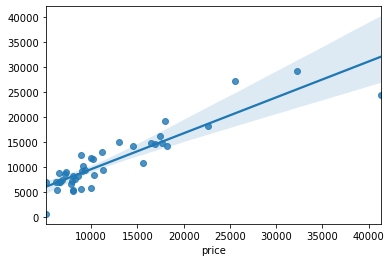

In [75]:
sns.regplot(y_test,pred3)